<a href="https://colab.research.google.com/github/Annmodels/lstm/blob/master/opencv_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Tutorial for Beginners

In [0]:
!pip install -q watermark

In [0]:
%load_ext watermark

%watermark -v -p cv2

CPython 3.6.9
IPython 5.5.0

cv2 4.1.2


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set_style("white")

rcParams['figure.figsize'] = 12, 10

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!gdown --id 16jP0_ESP0PXnrbygsWMeqlIU-jAP6dJ6

Downloading...
From: https://drive.google.com/uc?id=16jP0_ESP0PXnrbygsWMeqlIU-jAP6dJ6
To: /content/snail.jpg
100% 212k/212k [00:00<00:00, 30.8MB/s]


## Reading an image

There are [multiple flags](https://docs.opencv.org/4.2.0/d4/da8/group__imgcodecs.html#ga61d9b0126a3e57d9277ac48327799c80) for reading an image

In [0]:
img = cv2.imread(filename = 'snail.jpg', flags = cv2.IMREAD_COLOR)

## Width, height and color channels

In [0]:
h, w, channels = img.shape

print(f'height: {h}, width: {w}, color channels: {channels}')

height: 1710, width: 1600, color channels: 3


## Show image

This is Toby:

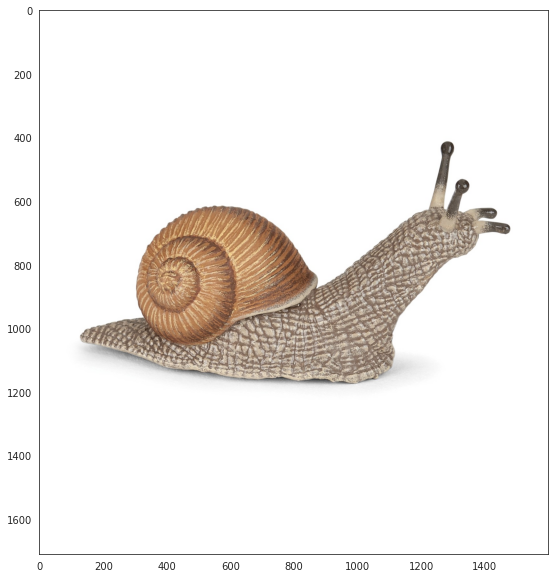

In [0]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2RGB));

Toby was an HR representative in a small paper supplier company. His boss was a really cool dude. Sadly, the boss didn't like Toby, at all!



## Default color channels are BGR

On some days, Toby was blue (he didn't know about weird OpenCV default color channels):

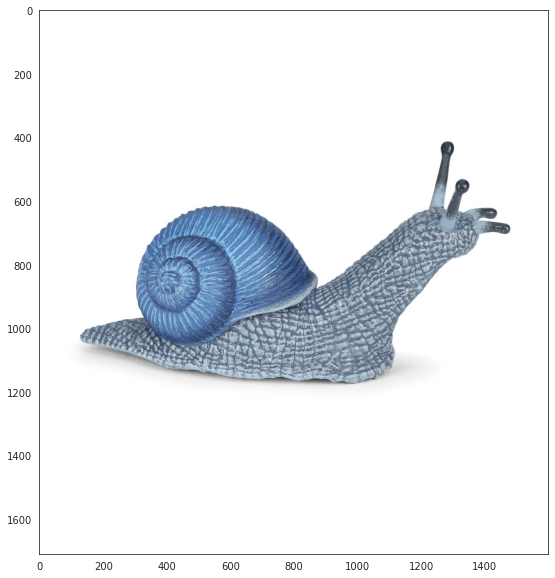

In [0]:
plt.imshow(img);

## Turning into gray

On some days, he was beyond 50 shades of gray:

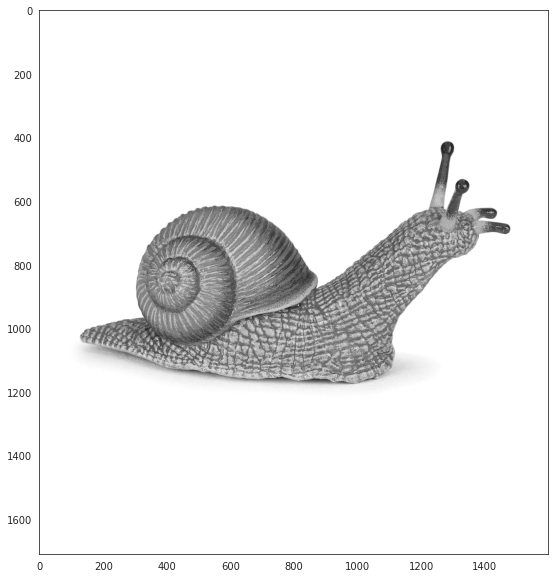

In [0]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY), cmap = 'gray');

## Saving an image

In [0]:
cv2.imwrite('snail-gray.jpg', cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY))

True

In [0]:
def show_image(image, show_axis=True):
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if not show_axis:
    plt.axis('off');

## Resizing

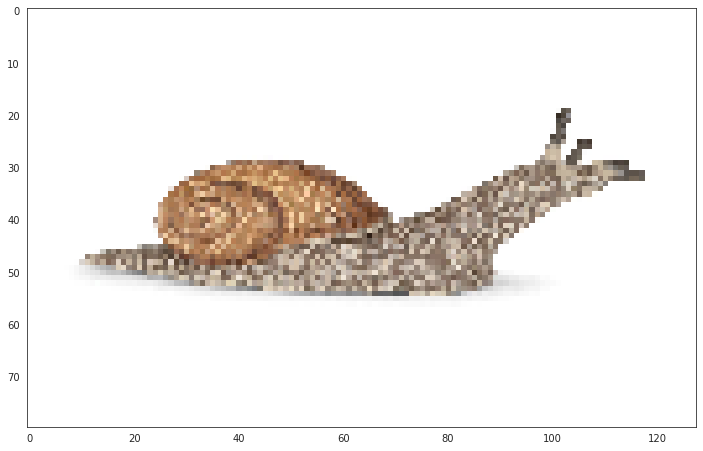

In [0]:
resize_width, resize_height = 128, 80

resized = cv2.resize(
  src = img, 
  dsize=(resize_width, resize_height), 
  interpolation=cv2.INTER_LANCZOS4
)

show_image(resized)

## Cropping

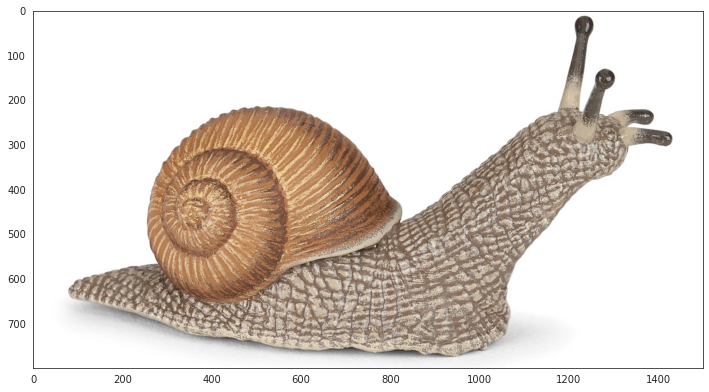

In [0]:
cropped = img[400:1200, 50:1550]

show_image(cropped)

## Rotation

On some days, he felt like his head was spinning (coronavirus?):

In [0]:
# Code by Adrian Rosebrock 
# https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/

def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

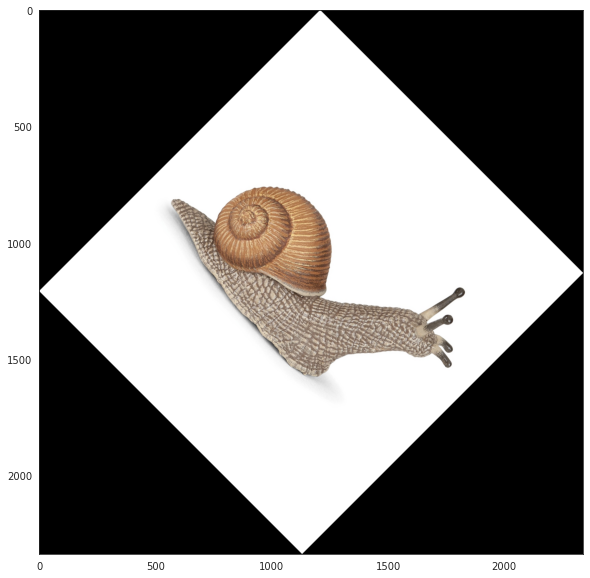

In [0]:
show_image(rotate_bound(img, 45))

## Blurring an image

Toby was unhappily divorced #exhusband right in the middle of his mid-life crisis.

One day, he decided it was time for a change. He wanted to be successful. He looked around the modern web, in his free time (which is all the time) and noticed something strange.

There were these extremely good looking guys, which others called influencers. They were famous, making lots of cash, and didn't even have to go to work.

Toby noticed something else. The more good looking the influencer, the more shit he/she can talk without even being questioned (the Law of Toby).

Our hero had a brilliant idea. From now on, he was going to be an influencer. He even shouted it in the office, but nobody really cared.

He quickly created a plan/checklist and started acting (without a second thought). He was learning OpenCV, on the side. Finally, those skills were going to pay off.

He needed a gym:

In [0]:
!gdown --id 1vpUJWPcjhJ6qY9ebZ3uQGlP0OYSocXJg

Downloading...
From: https://drive.google.com/uc?id=1vpUJWPcjhJ6qY9ebZ3uQGlP0OYSocXJg
To: /content/gym.jpg
2.12MB [00:00, 66.3MB/s]


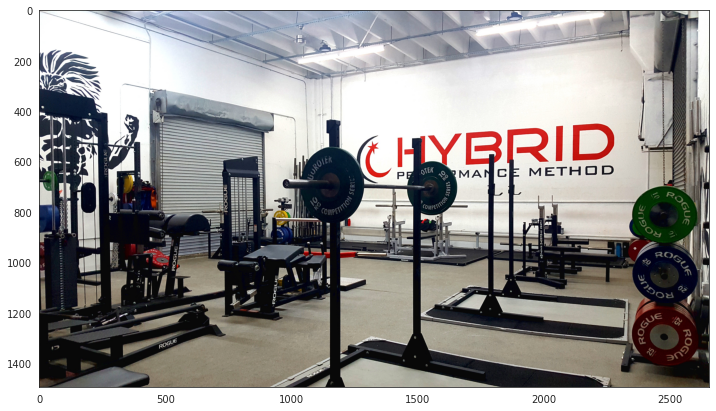

In [0]:
background = cv2.imread('gym.jpg', cv2.IMREAD_COLOR)
h, w, _ = background.shape

background = cv2.resize(background, (w // 2, h // 2))

show_image(background)

But he was the star of the show, so the gym shouldn't be so edgy:

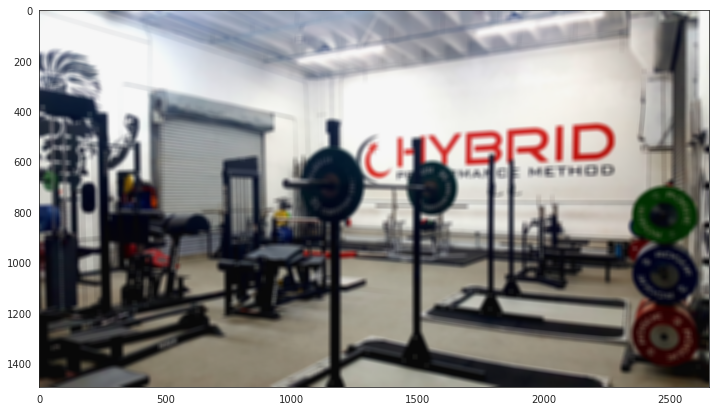

In [0]:
kernel_len = 21
blurred_background = cv2.GaussianBlur(
  src = background, 
  ksize = (kernel_len, kernel_len), 
  sigmaX = 120, 
  sigmaY = 45
)

show_image(blurred_background)

## Finding contours of an image

Naturally, he should be front and center of the show:

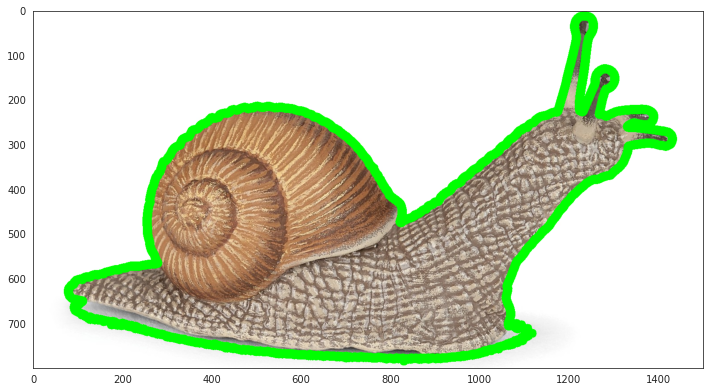

In [0]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(
  src = gray,
  thresh = 225,
  maxval = 255, 
  type = cv2.THRESH_BINARY_INV
)

contours, _ = cv2.findContours(
  image = binary, 
  mode = cv2.RETR_EXTERNAL, 
  method = cv2.CHAIN_APPROX_SIMPLE
)

contour_img = cropped.copy()

show_image(
  cv2.drawContours(
    image = contour_img, 
    contours = contours, 
    contourIdx = -1, 
    color = (0, 255, 0), 
    thickness = 20
  )
)

## Placing one image on top of another

Toby was determined to present himself in the best way possible. So he would cut himself out from the best portrait picture he had (using a mask):

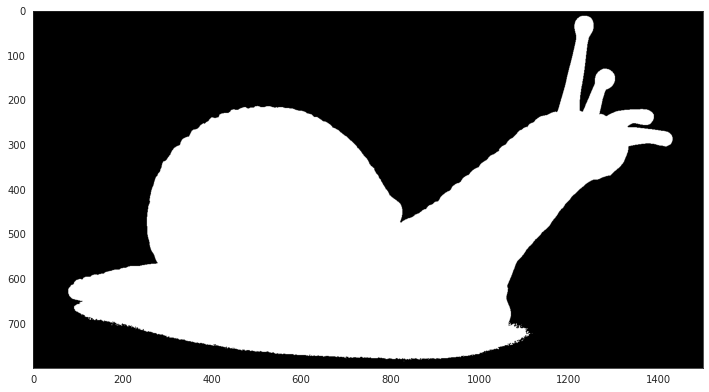

In [0]:
mask = np.zeros_like(cropped)
mask = cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)

show_image(mask)

In [0]:
masked_snail = cv2.bitwise_and(
  src1 = cropped, 
  src2 = cropped, 
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
)

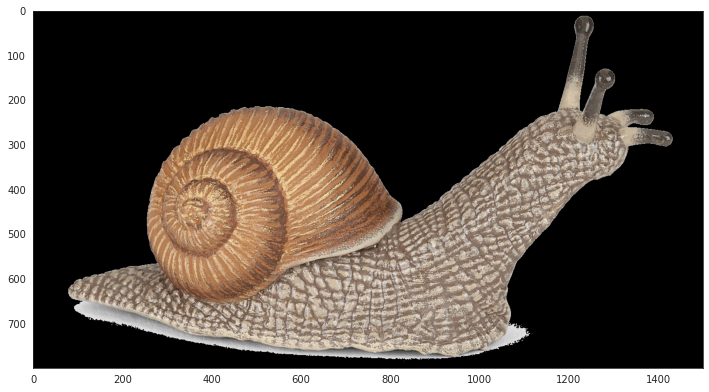

In [0]:
show_image(masked_snail)

And place himself at the magical gym selfie spot:

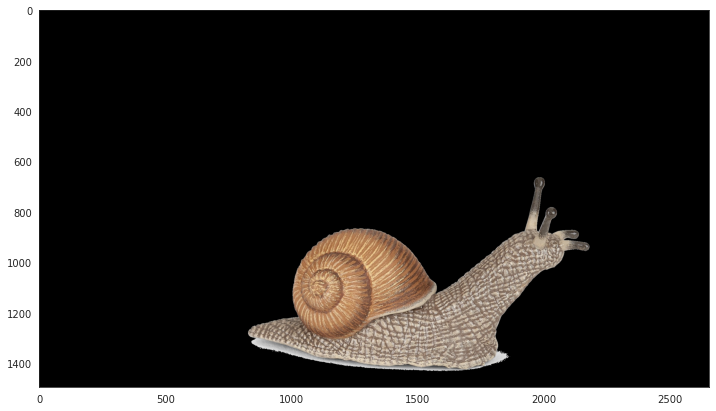

In [0]:
new_mask = np.zeros_like(blurred_background)
new_mask[
  650: 650 + masked_snail.shape[0],
  750: 750 + masked_snail.shape[1]
] = masked_snail

show_image(new_mask)

Finally, he could place himself on top of the gym background:

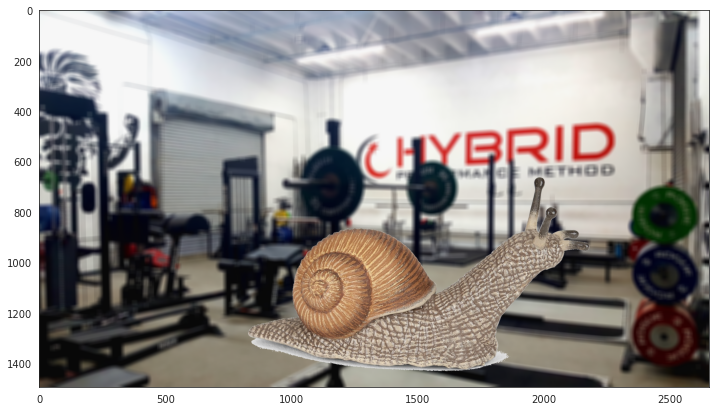

In [0]:
_, alpha = cv2.threshold(
  src = cv2.cvtColor(new_mask, cv2.COLOR_RGB2GRAY), 
  thresh = 0, 
  maxval = 255, 
  type = cv2.THRESH_BINARY
)
b, g, r = cv2.split(new_mask)
alpha_image = cv2.merge((b, g, r, alpha))
final_image = blurred_background.copy()
alpha_s = alpha_image[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
  final_image[:, :, c] = (alpha_s * alpha_image[:, :, c] +\
                          alpha_l * final_image[:, :, c])
show_image(final_image)

## Drawing circles

He also heard that blue eyes sell well:

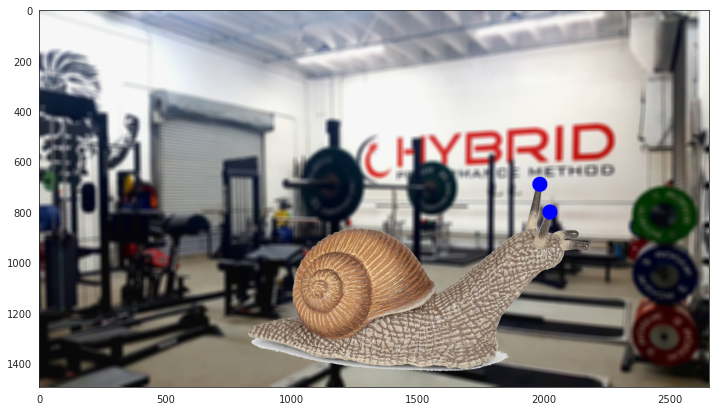

In [0]:
image = final_image.copy()

eye_coordinates = [(1985, 690), (2025, 800)]

for ec in eye_coordinates:
  image = cv2.circle(
    img = image, 
    center = ec, 
    radius = 30, 
    color = (255, 0, 0), 
    thickness = -1
  )

show_image(image)

## Drawing text

Finally, he had to make it a bit "по-така" (yes, knowing bulgarian is the SuperPower to have). He needed a special hashtag:

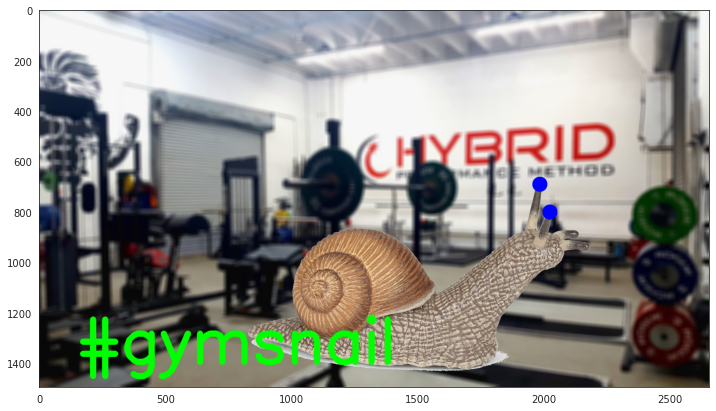

In [0]:
final_img = image.copy()

cv2.putText(
  img = final_img,
  text = '#gymsnail', 
  org = (150, final_img.shape[0] - 100), 
  fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
  fontScale = 8,
  color = (0, 255, 0),
  thickness = 23
)

show_image(final_img)

The plan was executed flawlessly. It took him only 3 years. He was starting his own fitness brand. It was going to be an epic experience. He was already imagining all the glute-focused workouts he was going to witness. That was the life he was always dreaming of!

He now had to do only one thing. Remember his super-secret password for all his social media accounts. Uncle Pesho had shown him TikTok, but sadly, he's been [logged out for a long time](https://www.youtube.com/watch?v=EscWTr9Pbms).

He uploaded his new image and started waiting. He is still waiting!